# Benford's Law Applied to San Diego City Budgets

This is a prototype, only covering FY11 data.
Next steps: retrieve 2011-2018 datam, analyze, aggregate, and chart.  Then write it up.

In [ ]:
%matplotlib inline

In [2]:
from urllib.request import urlretrieve
import pandas as pd
from collections import Counter, defaultdict
from pprint import pprint
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
benfords_distribution = [30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

### Retrieve City Budget Data

In [4]:
fn = 'operating_budget_FY{0}_datasd.csv'
base = 'http://seshat.datasd.org/budget/{0}'.format( fn )
datapath = './data/sdcity_benford/'

for year in range(11,19):
    dataurl = base.format( year )
    fn_ = fn.format( year )
    if not os.path.exists( datapath+fn_ ):
        print( 'retrieving FY{0}'.format( year ) )
        urlretrieve(dataurl,  datapath+fn_ )
    else:
        print ('FY{0} data on disk already'.format( year ) )

FY11 data on disk already
FY12 data on disk already
FY13 data on disk already
FY14 data on disk already
FY15 data on disk already
FY16 data on disk already
FY17 data on disk already
FY18 data on disk already


In [5]:
def dsum(*dicts):
    '''
    helper method to sum dictionaries by matching up their keys
    '''
    ret = defaultdict(int)
    for d in dicts:
        for k, v in d.items():
            ret[k] += v
    return dict(ret)

In [6]:
def get_yearly_benford( df ):
    '''
    calculate the distribution for leading digits in checking the benford distribution of a sequence of numbers
    '''
    amounts = df['amount']
    ctr = Counter()
    total = df[df['amount']>0]['amount'].count()
    for a in amounts:
        if a>0:
            digit = a.astype(str)[0]
        try:
            ctr[int(digit)]+=1
        except UnboundLocalError:
            pprint( a )
        
    pct = {}
    raw = {}
    for digit, ct in ctr.items():
        pct[digit] = ct/total
        raw[digit] = ct
        
    return {
        'distributions' : pct,
        'count' : total,
        'raw_counts' : raw
    }
            

### Run Year by Year Analysis and store results

In [7]:
data = {}
for year in range(11,19):
    df = pd.read_csv( 'data/sdcity_benford/operating_budget_FY{0}_datasd.csv'.format( year ) )
    data[year] = get_yearly_benford( df )

-2512.0


### Graph each year

In [12]:
def benford_chart( arr, year ):
    plt.figure()
    plt.style.use('seaborn-talk')
    plt.rc('figure', figsize=(10, 5))
    plt.xlabel('Leading Digit')
    plt.ylabel('Frequency (%)')
    plt.bar( sk, arr, label='{0} Distribution'.format( year ) )
    plt.plot( sk, benfords_distribution, 'r', label='Ideal Benford Distribution' )
    plt.legend(loc='upper right')

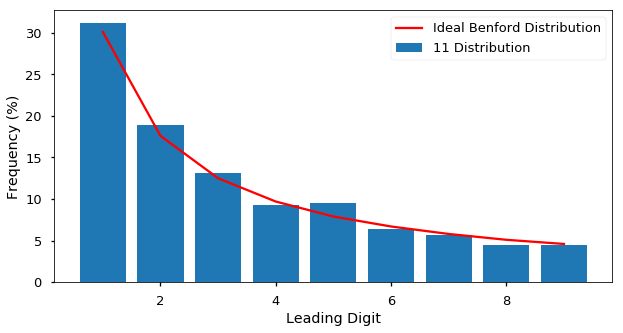

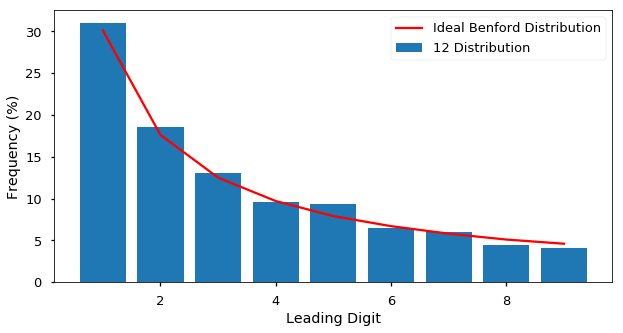

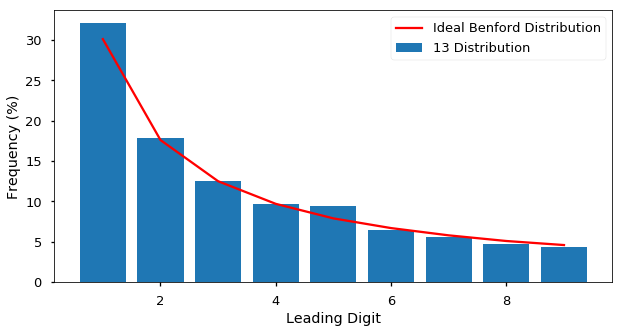

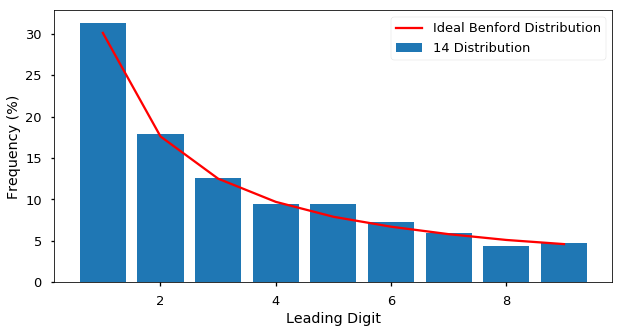

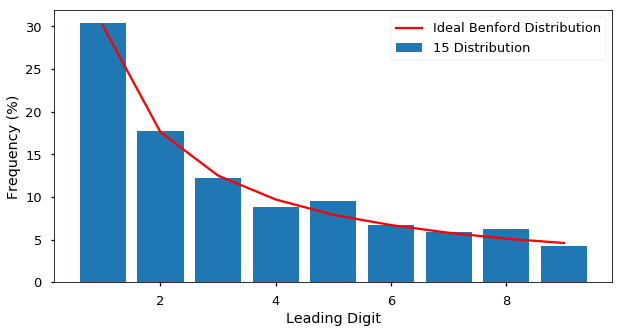

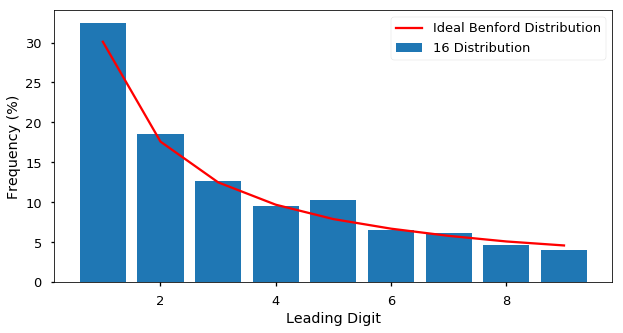

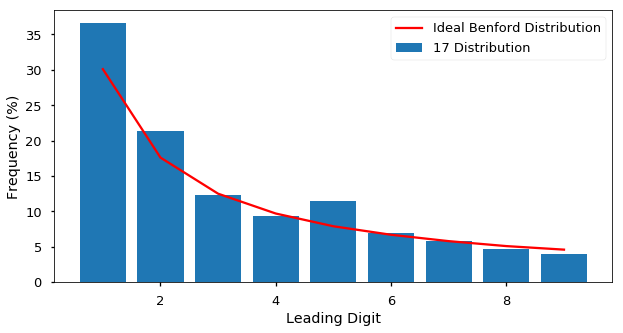

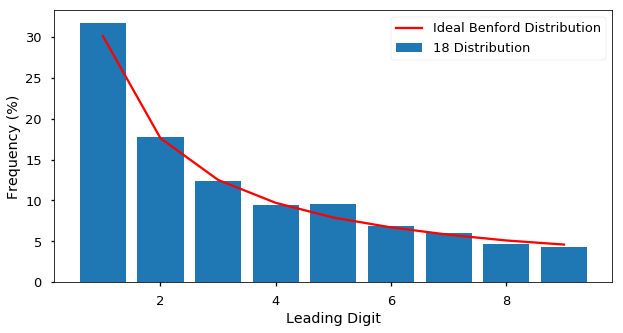

In [13]:
for year in range(11,19):
    d = data[year]['distributions']
    sk = sorted(d.keys())
    arr = []
    for k in sk:
        arr.append(d[k]*100)
    benford_chart( arr, year )

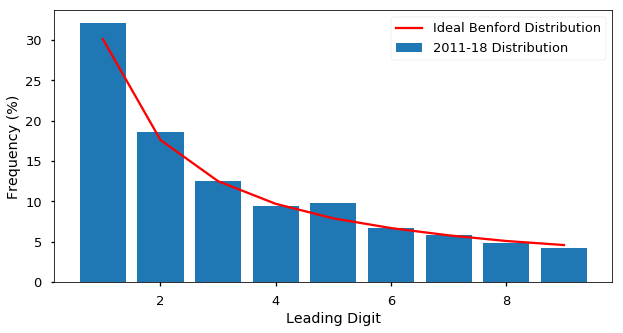

In [16]:
NUM_YEARS = 8
allyears = dsum(
    data[11]['distributions'], 
    data[12]['distributions'], 
    data[13]['distributions'], 
    data[14]['distributions'], 
    data[15]['distributions'], 
    data[16]['distributions'], 
    data[17]['distributions'], 
    data[18]['distributions'] )
allyears_norm = {}
for k,v in allyears.items():
    allyears_norm[k] = v/NUM_YEARS
# pprint( allyears_norm )
d = allyears_norm
sk = sorted(d.keys())
arr = []
for k in sk:
    arr.append(d[k]*100)
    
benford_chart( arr, '2011-18')

### end